## Perceptron Algorithm
name: Yang Chen <br>

Experiment and results requirements are the following:
1. 10 epochs for the hyperparameter cross-validation
2. 20 epochs to train the classifier with best hyperparameters
3. use the best trained classifier to evaluate on the test data

Results:
1. find the baseline of the model: always predict the most common results from the model
2. the best hyperparameter
3. the cross-validation accuracy for the best hyperparameter
4. the total number of updates the learning algorithm on the training set
5. training accuracy
6. test set accuracy
7. learning curve

variants of perceptrons:
1. the standard simple perceptron
2. the decaying
3. average (can be used for any variants of the perceptron)
4. margin

### Implement the first simple version of perceptron

In [1]:
# still we first read the data in
# because we basically in the perceptron algorithm do lots of vector calculation
# read the data as the numpy array
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def fileReader(file):
    # in total we have 123 features
    df = pd.read_csv(file, header=None, index_col=False)
    label = df[0]
    df.drop(columns=0, inplace=True)
    # here we extend the feature of the data with another column (1)
    # then we can include the b into the w
    df[207] = 1
    df = df.to_numpy()
    label = label.to_numpy()
    return df, label

# prepare all datasets
train_features, train_label = fileReader("data 2/csv-format/train.csv")
test_features, test_label = fileReader("data 2/csv-format/test.csv")
cv1_features, cv1_label = fileReader("data 2/csv-format/CVfolds/fold1.csv")
cv2_features, cv2_label = fileReader("data 2/csv-format/CVfolds/fold2.csv")
cv3_features, cv3_label = fileReader("data 2/csv-format/CVfolds/fold3.csv")
cv4_features, cv4_label = fileReader("data 2/csv-format/CVfolds/fold4.csv")
cv5_features, cv5_label = fileReader("data 2/csv-format/CVfolds/fold5.csv")

# test the shape of each
print(train_features.shape, train_label.shape)
print(test_features.shape, test_label.shape)
print(cv1_features.shape, cv1_label.shape)
print(cv2_features.shape, cv2_label.shape)
print(cv3_features.shape, cv3_label.shape)
print(cv4_features.shape, cv4_label.shape)
print(cv5_features.shape, cv5_label.shape)

(2230, 207) (2230,)
(558, 207) (558,)
(446, 207) (446,)
(446, 207) (446,)
(446, 207) (446,)
(446, 207) (446,)
(446, 207) (446,)


In [6]:
# here we write the baseline model to predict the most common label
def most_common(label):
     most = 1 if np.sum(label == 1) > np.sum(label == -1) else -1
     return most

def baseline_acc(most, label):
    res = np.full(label.shape, most)
    acc = np.sum(res == label) / label.shape[0]
    return acc

In [9]:
# for the baseline model we have
train_acc = baseline_acc(most_common(train_label), train_label)
print("The baseline acc of training set is %f" % train_acc)

test_acc = baseline_acc(most_common(test_label), test_label)
print("The baseline acc of training set is %f" % test_acc)

The baseline acc of training set is 0.513901
The baseline acc of training set is 0.543011


In [18]:
# predict and accuracy
def accuracy(weights, feature, label):
    # predict the result
    res = feature @ weights
    res[res >= 0] = 1
    res[res < 0] = -1
    print(res.shape)
    print(np.shape(res == label))
    acc = np.sum(res == label) / feature.shape[0]
    return acc

# The first simple version of the perceptron
# we use n+1 as 
def percep_simp(feature, label, learning_rate, epochs):
    np.random.seed(42)
    # initialize weights with random number in the range (-0.01, 0.01)
    updates  = 0
    accs = []
    ws = []
    num = feature.shape[1]
    w = np.random.uniform(-0.01, 0.01, size=(num,))
    # perceptron algorithm
    for epoch in range(epochs):
        print("During the %d epoch!!" % (epoch+1))
        # shuffle the feature and label accordingly
        # use the shape[0] to shuffle these two arrays
        s = np.arange(feature.shape[0])
        np.random.shuffle(s)
        shuffled_feature = feature[s]
        shuffled_label = label[s]
        # predict and update the w accordingly
        for i, x in enumerate(shuffled_feature):
            y = shuffled_label[i]
            if y*(x @ w) <= 0:
                # we update the w with learning rate*x
                w += learning_rate*y*x
                updates += 1
        acc = accuracy(w, feature, label)
        accs.append(acc)
        ws.append(w)
        print("The training accuracy at %d epoch is %f." % (epoch+1, acc))
        print("Finish the %d epoch" % (epoch+1))
    return w, updates, accs, ws

In [19]:
# the second perceptron algorithm with decaying learning rate
# we can simply use the epoch to indicate the time
def percep_decay(feature, label, learning_rate, epochs):
    np.random.seed(42)
    # initialize weights with random number in the range (-0.01, 0.01)
    updates = 0
    accs = []
    ws = []
    num = feature.shape[1]
    w = np.random.uniform(-0.01, 0.01, size=(num,))
    for epoch in range(epochs):
        print("During the %d epoch!!" % (epoch+1))
        # shuffle the feature and label accordingly
        # use the shape[0] to shuffle these two arrays
        s = np.arange(feature.shape[0])
        np.random.shuffle(s)
        shuffled_feature = feature[s]
        shuffled_label = label[s]
        # predict and update the w accordingly
        for i,x in enumerate(shuffled_feature):
            y = shuffled_label[i]
            if y*(x @ w) <= 0:
                # we update the w with learning rate*x
                w += learning_rate/(1 + epoch)*y*x
                updates += 1
        acc = accuracy(w, feature, label)
        accs.append(acc)
        ws.append(w)
        print("The training accuracy at %d epoch is %f." % (epoch+1, acc))
        print("Finish the %d epoch" % (epoch+1))
    return w, updates, accs, ws

In [23]:
# the third perceptron algorithm with average on the original perceptron
# the returned will be big isn't it???
def percep_avg(feature, label, learning_rate, epochs):
    # initialize weights with random number in the range (-0.01, 0.01)
    np.random.seed(42)
    updates  = 0
    num = feature.shape[1]
    w = np.random.uniform(-0.01, 0.01, size=(num,))
    avg = np.zeros((num,))
    avgs = []
    accs = []
    # perceptron algorithm
    for epoch in range(epochs):
        print("During the %d epoch!!" % (epoch+1))
        # shuffle the feature and label accordingly
        # use the shape[0] to shuffle these two arrays
        s = np.arange(feature.shape[0])
        np.random.shuffle(s)
        shuffled_feature = feature[s]
        shuffled_label = label[s]
        # predict and update the w accordingly
        for i, x in enumerate(shuffled_feature):
            y = shuffled_label[i]
            if y*(x @ w) <= 0:
                # we update the w with learning rate*x
                w += learning_rate/(1 + epoch)*y*x
                updates += 1
            # we add the weights to the avg
            avg += w
        acc = accuracy(avg, feature, label)
        accs.append(acc)
        avgs.append(avg)
        print("The training accuracy at %d epoch is %f." % (epoch+1, acc))
        print("Finish the %d epoch" % (epoch+1))
    return avg, updates, accs, avgs

In [21]:
# Here we implement the last classifier
def percep_margin(feature, label, learning_rate, epochs, margin):
    # initialize weights with random number in the range (-0.01, 0.01)
    np.random.seed(42)
    updates = 0
    accs = []
    ws = []
    num = feature.shape[1]
    w = np.random.uniform(-0.01, 0.01, size=(num,))
    # perceptron algorithm
    for epoch in range(epochs):
        print("During the %d epoch!!" % (epoch+1))
        # shuffle the feature and label accordingly
        # use the shape[0] to shuffle these two arrays
        s = np.arange(feature.shape[0])
        np.random.shuffle(s)
        shuffled_feature = feature[s]
        shuffled_label = label[s]
        # predict and update the w accordingly
        for i, x in enumerate(shuffled_feature):
            y = shuffled_label[i]
            if y*(x @ w) <= margin:
                # we update the w with learning rate*x
                w += learning_rate/(1 + epoch)*y*x
                updates += 1
        acc = accuracy(w, feature, label)
        accs.append(acc)
        ws.append(w)
        print("The training accuracy at %d epoch is %f." % (epoch+1, acc))
        print("Finish the %d epoch" % (epoch+1))
    return w, updates, accs, ws

In [16]:
# we iterate through each depth and each fold as the validation set
learning_rates = [1, 0.1, 0.01]
train_feature_folds = [cv1_features, cv2_features, cv3_features, cv4_features, cv5_features]
train_label_folds = [cv1_label, cv2_label, cv3_label, cv4_label, cv5_label]
num_of_folds = len(train_feature_folds)
accs = np.zeros([len(learning_rates), num_of_folds])

for j,lr in enumerate(learning_rates):
    for i in range(num_of_folds):
        print("We are doing the cross_validation on lr: %f and the %d group as validation set!" % (lr, i+1))
        train_concat_features = np.concatenate([train_feature_folds[j] for j in range(num_of_folds) if j != i])
        train_concat_labels = np.concatenate([train_label_folds[j] for j in range(num_of_folds) if j != i])
        w, updates, _, _ = percep_simp(train_concat_features, train_concat_labels, lr, epochs=10)
        acc = accuracy(w, train_feature_folds[i], train_label_folds[i])
        accs[j][i] = acc

print("Finished!")

We are doing the cross_validation on lr: 1.000000 and the 1 group as validation set!
During the 1 epoch!!
(1784,)
(1784,)
The training accuracy at 1 epoch is 0.687220.
Finish the 1 epoch
During the 2 epoch!!
(1784,)
(1784,)
The training accuracy at 2 epoch is 0.699552.
Finish the 2 epoch
During the 3 epoch!!
(1784,)
(1784,)
The training accuracy at 3 epoch is 0.752242.
Finish the 3 epoch
During the 4 epoch!!
(1784,)
(1784,)
The training accuracy at 4 epoch is 0.697870.
Finish the 4 epoch
During the 5 epoch!!
(1784,)
(1784,)
The training accuracy at 5 epoch is 0.787556.
Finish the 5 epoch
During the 6 epoch!!
(1784,)
(1784,)
The training accuracy at 6 epoch is 0.772422.
Finish the 6 epoch
During the 7 epoch!!
(1784,)
(1784,)
The training accuracy at 7 epoch is 0.762892.
Finish the 7 epoch
During the 8 epoch!!
(1784,)
(1784,)
The training accuracy at 8 epoch is 0.770740.
Finish the 8 epoch
During the 9 epoch!!
(1784,)
(1784,)
The training accuracy at 9 epoch is 0.708520.
Finish the 9 epo

In [17]:
print(accs)
avg_accs = np.mean(accs, axis=1)
stds = np.std(accs, axis=1)
for i in range(len(learning_rates)):
    print("The average cross-validated accuracy with learning rate %f is %f" % (learning_rates[i], avg_accs[i]))
    print("The average cross-validated std with learning rate %f is %f" % (learning_rates[i], stds[i]))

[[0.74887892 0.75336323 0.71973094 0.72869955 0.71300448]
 [0.74887892 0.75336323 0.71973094 0.72869955 0.71300448]
 [0.78475336 0.77578475 0.72197309 0.71524664 0.72197309]]
The average cross-validated accuracy with learning rate 1.000000 is 0.732735
The average cross-validated std with learning rate 1.000000 is 0.015880
The average cross-validated accuracy with learning rate 0.100000 is 0.732735
The average cross-validated std with learning rate 0.100000 is 0.015880
The average cross-validated accuracy with learning rate 0.010000 is 0.743946
The average cross-validated std with learning rate 0.010000 is 0.029894


During the 1 epoch!!
(2230,)
(2230,)
The training accuracy at 1 epoch is 0.729148.
Finish the 1 epoch
During the 2 epoch!!
(2230,)
(2230,)
The training accuracy at 2 epoch is 0.678027.
Finish the 2 epoch
During the 3 epoch!!
(2230,)
(2230,)
The training accuracy at 3 epoch is 0.743498.
Finish the 3 epoch
During the 4 epoch!!
(2230,)
(2230,)
The training accuracy at 4 epoch is 0.738117.
Finish the 4 epoch
During the 5 epoch!!
(2230,)
(2230,)
The training accuracy at 5 epoch is 0.771749.
Finish the 5 epoch
During the 6 epoch!!
(2230,)
(2230,)
The training accuracy at 6 epoch is 0.790583.
Finish the 6 epoch
During the 7 epoch!!
(2230,)
(2230,)
The training accuracy at 7 epoch is 0.784753.
Finish the 7 epoch
During the 8 epoch!!
(2230,)
(2230,)
The training accuracy at 8 epoch is 0.777578.
Finish the 8 epoch
During the 9 epoch!!
(2230,)
(2230,)
The training accuracy at 9 epoch is 0.798655.
Finish the 9 epoch
During the 10 epoch!!
(2230,)
(2230,)
The training accuracy at 10 epoch is 0.70000

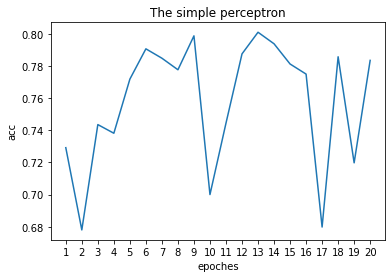

In [18]:
# We use the best chosen learning rate to train on the full dataset
trained_w, updates, trained_accs, trained_ws = percep_simp(train_features, train_label, 0.01, epochs=20)
print("The total updates during the training is %d" % updates)
iterations = np.arange(1,21)
plt.plot(iterations, trained_accs)
plt.xticks(np.arange(1, 21, 1.0))
plt.xlabel("epoches")
plt.ylabel("acc")
plt.title("The simple perceptron")
plt.savefig("percep_simp.jpg")
plt.show()

In [19]:
# find the corresponding info
print(max(trained_accs))
best_w = trained_ws[12]

# use the best trained w to predict the test datasets
acc = accuracy(best_w, test_features, test_label)
print("The testing on test dataset with the weights from the simple perceptron is %f" % acc)

0.8008968609865471
(558,)
(558,)
The testing on test dataset with the weights from the simple perceptron is 0.768817


### The decaying learning rate of perceptron algorithm

In [20]:
# step1: cross_validation
# we iterate through each depth and each fold as the validation set
learning_rates = [1, 0.1, 0.01]
train_feature_folds = [cv1_features, cv2_features, cv3_features, cv4_features, cv5_features]
train_label_folds = [cv1_label, cv2_label, cv3_label, cv4_label, cv5_label]
num_of_folds = len(train_feature_folds)
accs = np.zeros([len(learning_rates), num_of_folds])

for j,lr in enumerate(learning_rates):
    for i in range(num_of_folds):
        print("We are doing the cross_validation on lr: %f and the %d group as validation set!" % (lr, i+1))
        train_concat_features = np.concatenate([train_feature_folds[j] for j in range(num_of_folds) if j != i])
        train_concat_labels = np.concatenate([train_label_folds[j] for j in range(num_of_folds) if j != i])
        w, updates, _, _ = percep_decay(train_concat_features, train_concat_labels, lr, epochs=10)
        acc = accuracy(w, train_feature_folds[i], train_label_folds[i])
        accs[j][i] = acc

print("Finished!")

print(accs)
avg_accs = np.mean(accs, axis=1)
stds = np.std(accs, axis=1)
for i in range(len(learning_rates)):
    print("The average cross-validated accuracy with learning rate %f is %f" % (learning_rates[i], avg_accs[i]))
    print("The average cross-validated std with learning rate %f is %f" % (learning_rates[i], stds[i]))

We are doing the cross_validation on lr: 1.000000 and the 1 group as validation set!
During the 1 epoch!!
(1784,)
(1784,)
The training accuracy at 1 epoch is 0.687220.
Finish the 1 epoch
During the 2 epoch!!
(1784,)
(1784,)
The training accuracy at 2 epoch is 0.775224.
Finish the 2 epoch
During the 3 epoch!!
(1784,)
(1784,)
The training accuracy at 3 epoch is 0.786996.
Finish the 3 epoch
During the 4 epoch!!
(1784,)
(1784,)
The training accuracy at 4 epoch is 0.693386.
Finish the 4 epoch
During the 5 epoch!!
(1784,)
(1784,)
The training accuracy at 5 epoch is 0.820067.
Finish the 5 epoch
During the 6 epoch!!
(1784,)
(1784,)
The training accuracy at 6 epoch is 0.813901.
Finish the 6 epoch
During the 7 epoch!!
(1784,)
(1784,)
The training accuracy at 7 epoch is 0.805493.
Finish the 7 epoch
During the 8 epoch!!
(1784,)
(1784,)
The training accuracy at 8 epoch is 0.812220.
Finish the 8 epoch
During the 9 epoch!!
(1784,)
(1784,)
The training accuracy at 9 epoch is 0.810538.
Finish the 9 epo

During the 1 epoch!!
(2230,)
(2230,)
The training accuracy at 1 epoch is 0.713901.
Finish the 1 epoch
During the 2 epoch!!
(2230,)
(2230,)
The training accuracy at 2 epoch is 0.760538.
Finish the 2 epoch
During the 3 epoch!!
(2230,)
(2230,)
The training accuracy at 3 epoch is 0.789238.
Finish the 3 epoch
During the 4 epoch!!
(2230,)
(2230,)
The training accuracy at 4 epoch is 0.787444.
Finish the 4 epoch
During the 5 epoch!!
(2230,)
(2230,)
The training accuracy at 5 epoch is 0.802691.
Finish the 5 epoch
During the 6 epoch!!
(2230,)
(2230,)
The training accuracy at 6 epoch is 0.785202.
Finish the 6 epoch
During the 7 epoch!!
(2230,)
(2230,)
The training accuracy at 7 epoch is 0.807175.
Finish the 7 epoch
During the 8 epoch!!
(2230,)
(2230,)
The training accuracy at 8 epoch is 0.789686.
Finish the 8 epoch
During the 9 epoch!!
(2230,)
(2230,)
The training accuracy at 9 epoch is 0.775336.
Finish the 9 epoch
During the 10 epoch!!
(2230,)
(2230,)
The training accuracy at 10 epoch is 0.78340

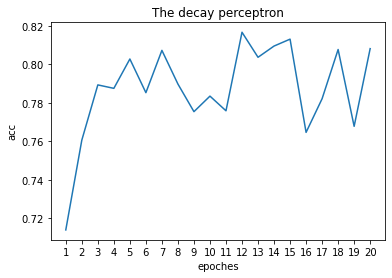

In [23]:
# train on the training data to find the best weight
# We use the best chosen learning rate to train on the full dataset
final_w, updates, trained_accs, trained_ws = percep_decay(train_features, train_label, 0.1, epochs=20)
print("The total updates during the training is %d" % updates)
iterations = np.arange(1,21)
plt.plot(iterations, trained_accs)
plt.xticks(np.arange(1, 21, 1.0))
plt.xlabel("epoches")
plt.ylabel("acc")
plt.title("The decay perceptron")
plt.savefig("percep_decay.jpg")
plt.show()

In [24]:
# step 3: find the best acc with specific iteration
print(max(trained_accs))
best_w = trained_ws[11]

# use the best trained w to predict the test datasets
acc = accuracy(best_w, test_features, test_label)
print("The testing on test dataset with the weights from the simple perceptron is %f" % acc)

0.816591928251121
(558,)
(558,)
The testing on test dataset with the weights from the simple perceptron is 0.783154


### The averaged perceptron algorithm

In [22]:
# step1: cross_validation
# we iterate through each depth and each fold as the validation set
learning_rates = [1, 0.1, 0.01]
train_feature_folds = [cv1_features, cv2_features, cv3_features, cv4_features, cv5_features]
train_label_folds = [cv1_label, cv2_label, cv3_label, cv4_label, cv5_label]
num_of_folds = len(train_feature_folds)
accs = np.zeros([len(learning_rates), num_of_folds])

for j,lr in enumerate(learning_rates):
    for i in range(num_of_folds):
        print("We are doing the cross_validation on lr: %f and the %d group as validation set!" % (lr, i+1))
        train_concat_features = np.concatenate([train_feature_folds[j] for j in range(num_of_folds) if j != i])
        train_concat_labels = np.concatenate([train_label_folds[j] for j in range(num_of_folds) if j != i])
        avg, updates, _, _ = percep_avg(train_concat_features, train_concat_labels, lr, epochs=10)
        acc = accuracy(avg, train_feature_folds[i], train_label_folds[i])
        accs[j][i] = acc

print("Finished!")

print(accs)
avg_accs = np.mean(accs, axis=1)
stds = np.std(accs, axis=1)
for i in range(len(learning_rates)):
    print("The average cross-validated accuracy with learning rate %f is %f" % (learning_rates[i], avg_accs[i]))
    print("The average cross-validated std with learning rate %f is %f" % (learning_rates[i], stds[i]))

We are doing the cross_validation on lr: 1.000000 and the 1 group as validation set!
During the 1 epoch!!
(1784,)
(1784,)
The training accuracy at 1 epoch is 0.754484.
Finish the 1 epoch
During the 2 epoch!!
(1784,)
(1784,)
The training accuracy at 2 epoch is 0.796525.
Finish the 2 epoch
During the 3 epoch!!
(1784,)
(1784,)
The training accuracy at 3 epoch is 0.811099.
Finish the 3 epoch
During the 4 epoch!!
(1784,)
(1784,)
The training accuracy at 4 epoch is 0.822870.
Finish the 4 epoch
During the 5 epoch!!
(1784,)
(1784,)
The training accuracy at 5 epoch is 0.823991.
Finish the 5 epoch
During the 6 epoch!!
(1784,)
(1784,)
The training accuracy at 6 epoch is 0.822870.
Finish the 6 epoch
During the 7 epoch!!
(1784,)
(1784,)
The training accuracy at 7 epoch is 0.825112.
Finish the 7 epoch
During the 8 epoch!!
(1784,)
(1784,)
The training accuracy at 8 epoch is 0.824552.
Finish the 8 epoch
During the 9 epoch!!
(1784,)
(1784,)
The training accuracy at 9 epoch is 0.827354.
Finish the 9 epo

During the 1 epoch!!
(2230,)
(2230,)
The training accuracy at 1 epoch is 0.757399.
Finish the 1 epoch
During the 2 epoch!!
(2230,)
(2230,)
The training accuracy at 2 epoch is 0.794619.
Finish the 2 epoch
During the 3 epoch!!
(2230,)
(2230,)
The training accuracy at 3 epoch is 0.808520.
Finish the 3 epoch
During the 4 epoch!!
(2230,)
(2230,)
The training accuracy at 4 epoch is 0.815695.
Finish the 4 epoch
During the 5 epoch!!
(2230,)
(2230,)
The training accuracy at 5 epoch is 0.819283.
Finish the 5 epoch
During the 6 epoch!!
(2230,)
(2230,)
The training accuracy at 6 epoch is 0.819731.
Finish the 6 epoch
During the 7 epoch!!
(2230,)
(2230,)
The training accuracy at 7 epoch is 0.821525.
Finish the 7 epoch
During the 8 epoch!!
(2230,)
(2230,)
The training accuracy at 8 epoch is 0.823318.
Finish the 8 epoch
During the 9 epoch!!
(2230,)
(2230,)
The training accuracy at 9 epoch is 0.822870.
Finish the 9 epoch
During the 10 epoch!!
(2230,)
(2230,)
The training accuracy at 10 epoch is 0.82466

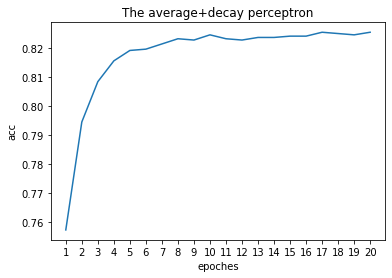

In [25]:
# train on the training data to find the best weight
# We use the best chosen learning rate to train on the full dataset
final_avg, updates, trained_accs, trained_avgs = percep_avg(train_features, train_label, 0.1, epochs=20)
print("The total updates during the training is %d" % updates)
iterations = np.arange(1,21)
plt.plot(iterations, trained_accs)
plt.xticks(np.arange(1, 21, 1.0))
plt.xlabel("epoches")
plt.ylabel("acc")
plt.title("The average+decay perceptron")
plt.savefig("percep_avg.jpg")
plt.show()

In [26]:
# step 3: find the best acc with specific iteration
print(max(trained_accs))
best_avg = trained_avgs[19]

# use the best trained w to predict the test datasets
acc = accuracy(best_avg, test_features, test_label)
print("The testing on test dataset with the weights from the simple perceptron is %f" % acc)

0.8255605381165919
(558,)
(558,)
The testing on test dataset with the weights from the simple perceptron is 0.804659


### The margin perceptron algorithm

In [30]:
# step1: cross_validation
# we iterate through each depth and each fold as the validation set
learning_rates = [1, 0.1, 0.01]
margins = [1, 0.1, 0.01]
train_feature_folds = [cv1_features, cv2_features, cv3_features, cv4_features, cv5_features]
train_label_folds = [cv1_label, cv2_label, cv3_label, cv4_label, cv5_label]
num_of_folds = len(train_feature_folds)
accs = np.zeros([len(learning_rates)*len(margins), num_of_folds])

for j,lr in enumerate(learning_rates):
    for k, margin in enumerate(margins):
        for i in range(num_of_folds):
            print("We are doing the cross_validation on lr: %f, margin: %f and the %d group as validation set!" % (lr, margin, i+1))
            train_concat_features = np.concatenate([train_feature_folds[j] for j in range(num_of_folds) if j != i])
            train_concat_labels = np.concatenate([train_label_folds[j] for j in range(num_of_folds) if j != i])
            w, updates, _, _ = percep_margin(train_concat_features, train_concat_labels, lr, epochs=10, margin=margin)
            acc = accuracy(w, train_feature_folds[i], train_label_folds[i])
            accs[j*3 + k][i] = acc

print("Finished!")

print(accs)
avg_accs = np.mean(accs, axis=1)
stds = np.std(accs, axis=1)
for i in range(len(learning_rates)):
    for j in range(len(margins)):
        print("The average cross-validated accuracy with learning rate %f and margin %f is %f" % (learning_rates[i], margins[j], avg_accs[i*3+j]))
        print("The average cross-validated std with learning rate %f and margin %f is %f" % (learning_rates[i], margins[j], stds[i*3+j]))


We are doing the cross_validation on lr: 1.000000, margin: 1.000000 and the 1 group as validation set!
During the 1 epoch!!
(1784,)
(1784,)
The training accuracy at 1 epoch is 0.678251.
Finish the 1 epoch
During the 2 epoch!!
(1784,)
(1784,)
The training accuracy at 2 epoch is 0.757287.
Finish the 2 epoch
During the 3 epoch!!
(1784,)
(1784,)
The training accuracy at 3 epoch is 0.799888.
Finish the 3 epoch
During the 4 epoch!!
(1784,)
(1784,)
The training accuracy at 4 epoch is 0.721413.
Finish the 4 epoch
During the 5 epoch!!
(1784,)
(1784,)
The training accuracy at 5 epoch is 0.818386.
Finish the 5 epoch
During the 6 epoch!!
(1784,)
(1784,)
The training accuracy at 6 epoch is 0.823430.
Finish the 6 epoch
During the 7 epoch!!
(1784,)
(1784,)
The training accuracy at 7 epoch is 0.808857.
Finish the 7 epoch
During the 8 epoch!!
(1784,)
(1784,)
The training accuracy at 8 epoch is 0.815022.
Finish the 8 epoch
During the 9 epoch!!
(1784,)
(1784,)
The training accuracy at 9 epoch is 0.818386

During the 1 epoch!!
(2230,)
(2230,)
The training accuracy at 1 epoch is 0.752018.
Finish the 1 epoch
During the 2 epoch!!
(2230,)
(2230,)
The training accuracy at 2 epoch is 0.789686.
Finish the 2 epoch
During the 3 epoch!!
(2230,)
(2230,)
The training accuracy at 3 epoch is 0.805830.
Finish the 3 epoch
During the 4 epoch!!
(2230,)
(2230,)
The training accuracy at 4 epoch is 0.823318.
Finish the 4 epoch
During the 5 epoch!!
(2230,)
(2230,)
The training accuracy at 5 epoch is 0.812108.
Finish the 5 epoch
During the 6 epoch!!
(2230,)
(2230,)
The training accuracy at 6 epoch is 0.838117.
Finish the 6 epoch
During the 7 epoch!!
(2230,)
(2230,)
The training accuracy at 7 epoch is 0.835426.
Finish the 7 epoch
During the 8 epoch!!
(2230,)
(2230,)
The training accuracy at 8 epoch is 0.795516.
Finish the 8 epoch
During the 9 epoch!!
(2230,)
(2230,)
The training accuracy at 9 epoch is 0.847982.
Finish the 9 epoch
During the 10 epoch!!
(2230,)
(2230,)
The training accuracy at 10 epoch is 0.85426

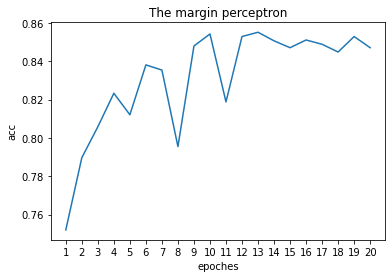

In [31]:
# train on the training data to find the best weight
# We use the best chosen learning rate to train on the full dataset
final_w, updates, trained_accs, trained_ws = percep_margin(train_features, train_label, 0.01, epochs=20, margin=0.1)
print("The total updates during the training is %d" % updates)
iterations = np.arange(1,21)
plt.plot(iterations, trained_accs)
plt.xticks(np.arange(1, 21, 1.0))
plt.xlabel("epoches")
plt.ylabel("acc")
plt.title("The margin perceptron")
plt.savefig("percep_margin.jpg")
plt.show()

In [32]:
# step 3: find the best acc with specific iteration
print(max(trained_accs))
best_w = trained_ws[12]

# use the best trained w to predict the test datasets
acc = accuracy(best_w, test_features, test_label)
print("The testing on test dataset with the weights from the simple perceptron is %f" % acc)


0.8551569506726457
(558,)
(558,)
The testing on test dataset with the weights from the simple perceptron is 0.815412


### Feature transformation

In [13]:
# First, we transform all dataset using a helper function with for loop
def help_transform(feature):
    transformed = []
    num_data, num_features = feature.shape
    # iterate through the dataset
    for i in range(num_data):
        append_features = []
        for j in range(num_features):
            for k in range(j, num_features):
                append_features.append(feature[i][j]*feature[i][k])
        transformed.append(append_features)
    transformed_array = np.array(transformed)
    return transformed_array

In [15]:
# transform all data
train_features_transformed = help_transform(train_features)
test_features_transformed = help_transform(test_features)
cv1_features_transformed = help_transform(cv1_features)
cv2_features_transformed = help_transform(cv2_features)
cv3_features_transformed = help_transform(cv3_features)
cv4_features_transformed = help_transform(cv4_features)
cv5_features_transformed = help_transform(cv5_features)

print(train_features_transformed.shape)
print(test_features_transformed.shape)
print(cv1_features_transformed.shape)
print(cv2_features_transformed.shape)
print(cv3_features_transformed.shape)
print(cv4_features_transformed.shape)
print(cv5_features_transformed.shape)

(2230, 21528)
(558, 21528)
(446, 21528)
(446, 21528)
(446, 21528)
(446, 21528)
(446, 21528)


In [24]:
# step1: cross_validation
# we iterate through each depth and each fold as the validation set
learning_rates = [1, 0.1, 0.01]
train_feature_folds = [cv1_features_transformed, cv2_features_transformed, cv3_features_transformed, cv4_features_transformed, cv5_features_transformed]
train_label_folds = [cv1_label, cv2_label, cv3_label, cv4_label, cv5_label]
num_of_folds = len(train_feature_folds)
accs = np.zeros([len(learning_rates), num_of_folds])

for j,lr in enumerate(learning_rates):
    for i in range(num_of_folds):
        print("We are doing the cross_validation on lr: %f and the %d group as validation set!" % (lr, i+1))
        train_concat_features = np.concatenate([train_feature_folds[j] for j in range(num_of_folds) if j != i])
        train_concat_labels = np.concatenate([train_label_folds[j] for j in range(num_of_folds) if j != i])
        avg, updates, _, _ = percep_avg(train_concat_features, train_concat_labels, lr, epochs=10)
        acc = accuracy(avg, train_feature_folds[i], train_label_folds[i])
        accs[j][i] = acc

print("Finished!")

print(accs)
avg_accs = np.mean(accs, axis=1)
stds = np.std(accs, axis=1)
for i in range(len(learning_rates)):
    print("The average cross-validated accuracy with learning rate %f is %f" % (learning_rates[i], avg_accs[i]))
    print("The average cross-validated std with learning rate %f is %f" % (learning_rates[i], stds[i]))

We are doing the cross_validation on lr: 1.000000 and the 1 group as validation set!
During the 1 epoch!!
(1784,)
(1784,)
The training accuracy at 1 epoch is 0.866031.
Finish the 1 epoch
During the 2 epoch!!
(1784,)
(1784,)
The training accuracy at 2 epoch is 0.922085.
Finish the 2 epoch
During the 3 epoch!!
(1784,)
(1784,)
The training accuracy at 3 epoch is 0.952915.
Finish the 3 epoch
During the 4 epoch!!
(1784,)
(1784,)
The training accuracy at 4 epoch is 0.965807.
Finish the 4 epoch
During the 5 epoch!!
(1784,)
(1784,)
The training accuracy at 5 epoch is 0.973094.
Finish the 5 epoch
During the 6 epoch!!
(1784,)
(1784,)
The training accuracy at 6 epoch is 0.978700.
Finish the 6 epoch
During the 7 epoch!!
(1784,)
(1784,)
The training accuracy at 7 epoch is 0.987108.
Finish the 7 epoch
During the 8 epoch!!
(1784,)
(1784,)
The training accuracy at 8 epoch is 0.988229.
Finish the 8 epoch
During the 9 epoch!!
(1784,)
(1784,)
The training accuracy at 9 epoch is 0.991592.
Finish the 9 epo

During the 1 epoch!!
(2230,)
(2230,)
The training accuracy at 1 epoch is 0.857848.
Finish the 1 epoch
During the 2 epoch!!
(2230,)
(2230,)
The training accuracy at 2 epoch is 0.925561.
Finish the 2 epoch
During the 3 epoch!!
(2230,)
(2230,)
The training accuracy at 3 epoch is 0.946188.
Finish the 3 epoch
During the 4 epoch!!
(2230,)
(2230,)
The training accuracy at 4 epoch is 0.965022.
Finish the 4 epoch
During the 5 epoch!!
(2230,)
(2230,)
The training accuracy at 5 epoch is 0.974439.
Finish the 5 epoch
During the 6 epoch!!
(2230,)
(2230,)
The training accuracy at 6 epoch is 0.982063.
Finish the 6 epoch
During the 7 epoch!!
(2230,)
(2230,)
The training accuracy at 7 epoch is 0.985650.
Finish the 7 epoch
During the 8 epoch!!
(2230,)
(2230,)
The training accuracy at 8 epoch is 0.987444.
Finish the 8 epoch
During the 9 epoch!!
(2230,)
(2230,)
The training accuracy at 9 epoch is 0.989238.
Finish the 9 epoch
During the 10 epoch!!
(2230,)
(2230,)
The training accuracy at 10 epoch is 0.99148

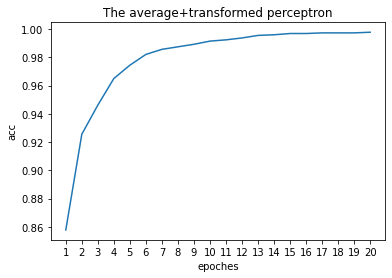

In [25]:
# train on the training data to find the best weight
# We use the best chosen learning rate to train on the full dataset
final_avg, updates, trained_accs, trained_avgs = percep_avg(train_features_transformed, train_label, 0.01, epochs=20)
print("The total updates during the training is %d" % updates)
iterations = np.arange(1,21)
plt.plot(iterations, trained_accs)
plt.xticks(np.arange(1, 21, 1.0))
plt.xlabel("epoches")
plt.ylabel("acc")
plt.title("The average+transformed perceptron")
plt.savefig("percep_trans.jpg")
plt.show()

In [26]:
# step 3: find the best acc with specific iteration
print(max(trained_accs))
best_avg = trained_avgs[19]

# use the best trained w to predict the test datasets
acc = accuracy(best_avg, test_features_transformed, test_label)
print("The testing on test dataset with the weights from the simple perceptron is %f" % acc)

0.9977578475336323
(558,)
(558,)
The testing on test dataset with the weights from the simple perceptron is 0.815412
